In [1]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive/657A3part2

/content/drive/My Drive/657A3part2


In [0]:
# loading basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# getting basic data in correct format to process
fea = []
for i in range(1,785):
  fea.append(str(i))
X = pd.read_csv('train.csv', usecols = fea)
y = pd.read_csv('train.csv', usecols= ['Label'])

In [0]:
# Splitting the Dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1,random_state = 42)

In [0]:
# Converting Dataframe to Numpy array
X_train =np.array(X_train, dtype ='float32')
X_test =np.array(X_test,dtype ='float32')
y_train =np.array(y_train,dtype ='float32')
y_test =np.array(y_test,dtype ='float32')
X = np.array(X, dtype ='float32')
y = np.array(y, dtype ='float32')

2.0

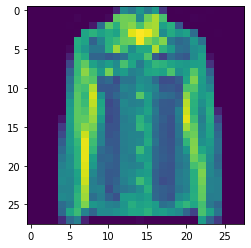

In [7]:
# lets see how an image looks like in training data
import random
i=random.randint(1,54000)
plt.imshow(X_train[i,:].reshape(28,28))
label=y_train[i,0]
label

In [0]:
#Preprocessing the Data before fitting to the model (all pixels are brought to same range i.e. all values lie between 0 and 1 now)
X_train =X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_train=X_train[:,:]/255
X_test= X_test[:,:]/255
X =X.reshape(X.shape[0],*(28,28,1))
X= X[:,:]/255

In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization, Activation, add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
image_rows = 28

image_cols = 28

batch_size = 512
image_shape = (image_rows,image_cols,1)
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=5,activation='relu',padding='same',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=1,activation='relu',padding='same'),
    Dropout(0.2),
    Flatten(), # 1flatten out the layers
    Dense(1024,activation='relu'),
    Dropout(0.25),
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=400,
    verbose=1,
    validation_data=(X_test,y_test)
)

Epoch 1/400
53/53 [==============================] - 2s 44ms/step - loss: 1.2046 - accuracy: 0.4687 - val_loss: 0.8790 - val_accuracy: 0.6242
Epoch 2/400
53/53 [==============================] - 2s 35ms/step - loss: 0.7892 - accuracy: 0.6653 - val_loss: 0.6768 - val_accuracy: 0.7218
Epoch 3/400
53/53 [==============================] - 2s 35ms/step - loss: 0.6527 - accuracy: 0.7307 - val_loss: 0.5810 - val_accuracy: 0.7627
Epoch 4/400
53/53 [==============================] - 2s 35ms/step - loss: 0.5757 - accuracy: 0.7653 - val_loss: 0.5265 - val_accuracy: 0.7908
Epoch 5/400
53/53 [==============================] - 2s 35ms/step - loss: 0.5307 - accuracy: 0.7853 - val_loss: 0.4899 - val_accuracy: 0.8052
Epoch 6/400
53/53 [==============================] - 2s 35ms/step - loss: 0.5002 - accuracy: 0.7993 - val_loss: 0.4739 - val_accuracy: 0.8092
Epoch 7/400
53/53 [==============================] - 2s 35ms/step - loss: 0.4741 - accuracy: 0.8103 - val_loss: 0.4525 - val_accuracy: 0.8183
Epoch 

In [0]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         8320      
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [0]:
evaluation= cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

188/188 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.9137
Test Accuracy:0.914


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


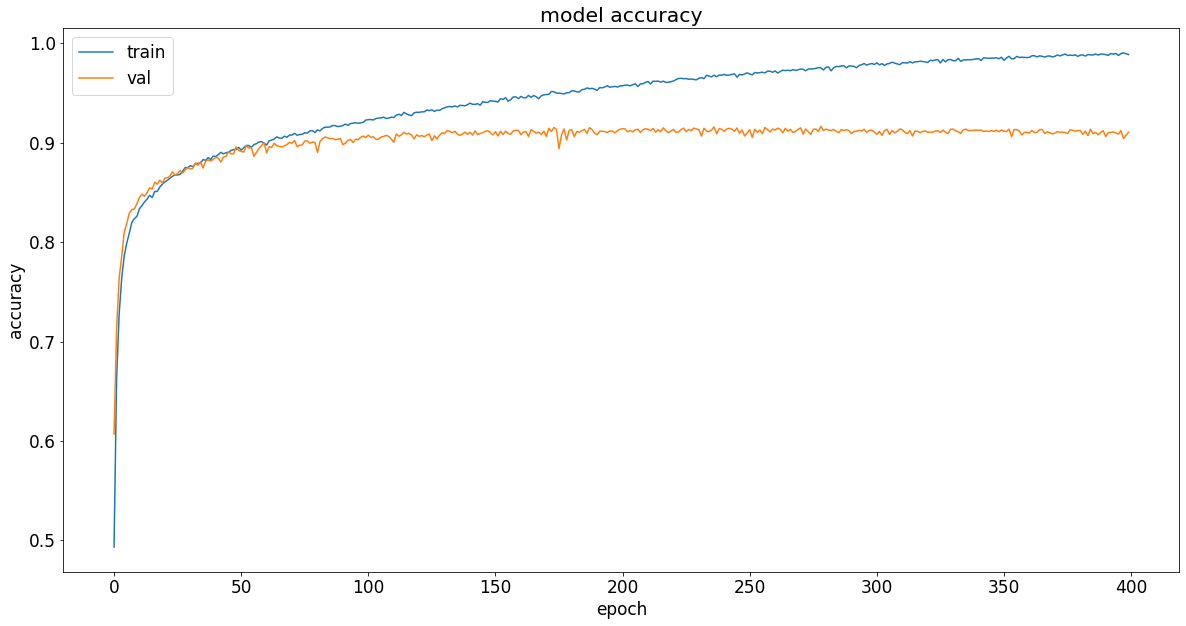

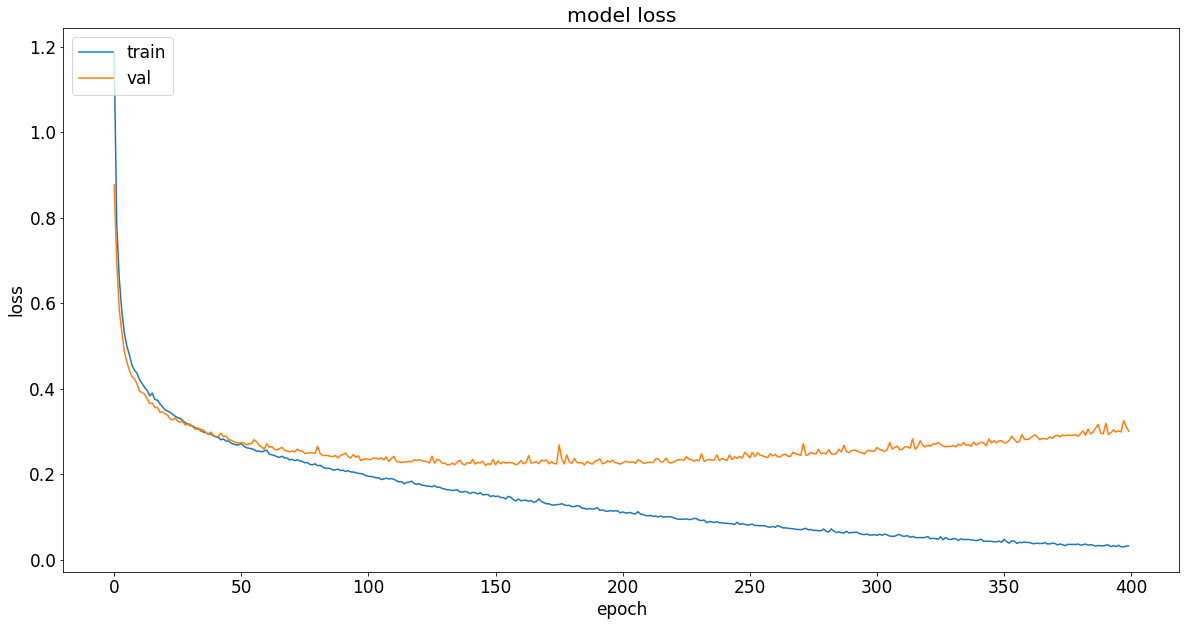

In [0]:
import matplotlib.pyplot as plt
#plt.rcParams['xtick.labelsize'] = 17
#plt.rcParams['ytick.labelsize'] = 17
#plt.rcParams['xlabel.fontsize'] = 17
plt.rcParams['font.size'] = 17
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [0]:
y_test

array([[1.],
       [0.],
       [2.],
       ...,
       [1.],
       [0.],
       [2.]], dtype=float32)

In [0]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# predict probabilities for test set
yhat_probs = cnn_model.predict(X_test, verbose=0)

yhat_classes = yhat_probs.argmax(axis=-1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average = 'macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average = 'macro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, average = 'macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs, multi_class= 'ovr')
print('ROC AUC: %f' % auc)

matrix = multilabel_confusion_matrix(y_test, yhat_classes, labels = [0,1,2,3,4])
print(matrix)

Accuracy: 0.913667
Precision: 0.913667
Recall: 0.913667
F1 score: 0.913667
Cohens kappa: 0.892076
ROC AUC: 0.992314
[[[4764   46]
  [  39 1151]]

 [[4669  101]
  [ 142 1088]]

 [[4678  140]
  [ 157 1025]]

 [[4681  144]
  [ 132 1043]]

 [[4690   87]
  [  48 1175]]]


In [0]:
test_fea = [str(i) for i in range(0,784)]
X_test_t = pd.read_csv('testX.csv', usecols=test_fea)

In [0]:
X_test_t =np.array(X_test_t, dtype ='float32')

In [0]:
X_test_t = X_test_t.reshape(X_test_t.shape[0],*(28,28,1))
X_test_t = X_test_t/255.0

In [0]:
X_test_t.shape

(10000, 28, 28, 1)

In [0]:
pred_test = cnn_model.predict_classes(X_test_t)


In [0]:
pred_test

array([3, 4, 0, ..., 4, 1, 2])

In [0]:
id = [i for i in range(0,10000)]
frame = pd.DataFrame(id, columns=['Id'])

In [0]:
frame['Label'] = pred_test

In [0]:
frame.to_csv(r'submission_model6_full_2.csv', index = False)

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions submit -c ece657a-w20-asg3-part2 -f submission_model6_full_2.csv -m "Submission Model 6 - Rishi2 - Updated - full train - 2"

100% 67.3k/67.3k [00:02<00:00, 28.5kB/s]
Successfully submitted to ECE 657A Assignment 3 Part 2

In [0]:
#code to make a submission
test_fea = [str(i) for i in range(0,784)]
X_test_t = pd.read_csv('testX.csv', usecols=test_fea)
X_test_t =np.array(X_test_t, dtype ='float32')
X_test_t = X_test_t.reshape(X_test_t.shape[0],*(28,28,1))
X_test_t = X_test_t/255.0
X_test_t.shape
pred_test = cnn_model.predict_classes(X_test_t)
pred_test
id = [i for i in range(0,10000)]
frame = pd.DataFrame(id, columns=['Id'])
frame['Label'] = pred_test
frame
frame.to_csv(r'submission.csv', index = False)
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions submit -c ece657a-w20-asg3-part2 -f submission.csv -m "more dropout Submission"

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
100% 67.3k/67.3k [00:02<00:00, 25.8kB/s]
Successfully submitted to ECE 657A Assignment 3 Part 2

In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization, Activation, add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
#2048 with 0.4 and 100, 500 epoch

image_rows = 28

image_cols = 28

batch_size = 512
image_shape = (image_rows,image_cols,1)
cnn_model40 = Sequential([
    Conv2D(filters=32,kernel_size=5,activation='relu',padding='same',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64,kernel_size=1,activation='relu',padding='same'),
    Flatten(), # 1flatten out the layers
    Dense(1024,activation='relu'),
    Dropout(0.4),
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])
cnn_model40.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])
history = cnn_model40.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=500,
    verbose=1,
    validation_data=(X_test,y_test)
)

Epoch 1/500
27/27 [==============================] - 1s 39ms/step - loss: 1.4251 - accuracy: 0.3825 - val_loss: 1.2222 - val_accuracy: 0.5133
Epoch 2/500
27/27 [==============================] - 1s 33ms/step - loss: 1.1060 - accuracy: 0.5352 - val_loss: 0.9673 - val_accuracy: 0.5628
Epoch 3/500
27/27 [==============================] - 1s 32ms/step - loss: 0.9091 - accuracy: 0.6059 - val_loss: 0.8139 - val_accuracy: 0.6555
Epoch 4/500
27/27 [==============================] - 1s 32ms/step - loss: 0.7860 - accuracy: 0.6684 - val_loss: 0.7169 - val_accuracy: 0.7020
Epoch 5/500
27/27 [==============================] - 1s 33ms/step - loss: 0.7096 - accuracy: 0.7050 - val_loss: 0.6508 - val_accuracy: 0.7355
Epoch 6/500
27/27 [==============================] - 1s 32ms/step - loss: 0.6476 - accuracy: 0.7334 - val_loss: 0.6021 - val_accuracy: 0.7577
Epoch 7/500
27/27 [==============================] - 1s 32ms/step - loss: 0.6038 - accuracy: 0.7547 - val_loss: 0.5580 - val_accuracy: 0.7775
Epoch 

In [13]:
#code to make a submission
test_fea = [str(i) for i in range(0,784)]
X_test_t = pd.read_csv('testX.csv', usecols=test_fea)
X_test_t =np.array(X_test_t, dtype ='float32')
X_test_t = X_test_t.reshape(X_test_t.shape[0],*(28,28,1))
X_test_t = X_test_t/255.0
X_test_t.shape
pred_test = cnn_model40.predict_classes(X_test_t)
pred_test
id = [i for i in range(0,10000)]
frame = pd.DataFrame(id, columns=['Id'])
frame['Label'] = pred_test
frame
frame.to_csv(r'submission.csv', index = False)
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions submit -c ece657a-w20-asg3-part2 -f submission.csv -m "more dropout Submission"


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
100% 67.3k/67.3k [00:06<00:00, 10.4kB/s]
Successfully submitted to ECE 657A Assignment 3 Part 2

In [0]:
#sigmoid
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1)
cnn_modelsi = Sequential([
    Conv2D(filters=32,kernel_size=5,activation='sigmoid',padding='same',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='sigmoid',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=1,activation='sigmoid',padding='same'),
    Dropout(0.2),
    Flatten(), # 1flatten out the layers
    Dense(1024,activation='sigmoid'),
    Dropout(0.25),
    Dense(32,activation='sigmoid'),
    Dense(5,activation = 'softmax')
])
cnn_modelsi.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])
history = cnn_modelsi.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=400,
    verbose=1,
    validation_data=(X_test,y_test)
)

Epoch 1/400
53/53 [==============================] - 2s 37ms/step - loss: 1.6412 - accuracy: 0.1986 - val_loss: 1.6115 - val_accuracy: 0.1970
Epoch 2/400
53/53 [==============================] - 2s 35ms/step - loss: 1.6112 - accuracy: 0.2017 - val_loss: 1.6099 - val_accuracy: 0.1958
Epoch 3/400
53/53 [==============================] - 2s 35ms/step - loss: 1.6115 - accuracy: 0.2002 - val_loss: 1.6111 - val_accuracy: 0.1970
Epoch 4/400
53/53 [==============================] - 2s 35ms/step - loss: 1.6113 - accuracy: 0.1998 - val_loss: 1.6097 - val_accuracy: 0.2038
Epoch 5/400
53/53 [==============================] - 2s 35ms/step - loss: 1.6106 - accuracy: 0.1983 - val_loss: 1.6100 - val_accuracy: 0.1970
Epoch 6/400
53/53 [==============================] - 2s 35ms/step - loss: 1.6104 - accuracy: 0.2015 - val_loss: 1.6100 - val_accuracy: 0.1958
Epoch 7/400
53/53 [==============================] - 2s 35ms/step - loss: 1.6100 - accuracy: 0.1989 - val_loss: 1.6094 - val_accuracy: 0.1958
Epoch 

In [0]:
#tanh
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1)
cnn_modelta = Sequential([
    Conv2D(filters=32,kernel_size=5,activation='tanh',padding='same',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='tanh',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=1,activation='tanh',padding='same'),
    Dropout(0.2),
    Flatten(), # 1flatten out the layers
    Dense(1024,activation='tanh'),
    Dropout(0.25),
    Dense(32,activation='tanh'),
    Dense(5,activation = 'softmax')
])
cnn_modelta.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])
history = cnn_modelta.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=400,
    verbose=1,
    validation_data=(X_test,y_test)
)

Epoch 1/400
53/53 [==============================] - 2s 38ms/step - loss: 1.0349 - accuracy: 0.5597 - val_loss: 0.8421 - val_accuracy: 0.6388
Epoch 2/400
53/53 [==============================] - 2s 36ms/step - loss: 0.7701 - accuracy: 0.6791 - val_loss: 0.7075 - val_accuracy: 0.7050
Epoch 3/400
53/53 [==============================] - 2s 36ms/step - loss: 0.6709 - accuracy: 0.7304 - val_loss: 0.6279 - val_accuracy: 0.7503
Epoch 4/400
53/53 [==============================] - 2s 36ms/step - loss: 0.6081 - accuracy: 0.7626 - val_loss: 0.5817 - val_accuracy: 0.7722
Epoch 5/400
53/53 [==============================] - 2s 36ms/step - loss: 0.5638 - accuracy: 0.7822 - val_loss: 0.5394 - val_accuracy: 0.7965
Epoch 6/400
53/53 [==============================] - 2s 36ms/step - loss: 0.5347 - accuracy: 0.7949 - val_loss: 0.5126 - val_accuracy: 0.8040
Epoch 7/400
53/53 [==============================] - 2s 36ms/step - loss: 0.5106 - accuracy: 0.8054 - val_loss: 0.4946 - val_accuracy: 0.8077
Epoch 

In [0]:
# sgd
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1)
cnn_modelsg = Sequential([
    Conv2D(filters=32,kernel_size=5,activation='relu',padding='same',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=1,activation='relu',padding='same'),
    Dropout(0.2),
    Flatten(), # 1flatten out the layers
    Dense(1024,activation='relu'),
    Dropout(0.25),
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])
cnn_modelsg.compile(loss ='sparse_categorical_crossentropy', optimizer=SGD(),metrics =['accuracy'])
history = cnn_modelsg.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=400,
    verbose=1,
    validation_data=(X_test,y_test)
)

Epoch 1/400
53/53 [==============================] - 2s 37ms/step - loss: 1.5890 - accuracy: 0.2207 - val_loss: 1.5680 - val_accuracy: 0.2235
Epoch 2/400
53/53 [==============================] - 2s 35ms/step - loss: 1.5455 - accuracy: 0.2746 - val_loss: 1.4999 - val_accuracy: 0.3555
Epoch 3/400
53/53 [==============================] - 2s 35ms/step - loss: 1.4537 - accuracy: 0.3846 - val_loss: 1.3573 - val_accuracy: 0.4788
Epoch 4/400
53/53 [==============================] - 2s 35ms/step - loss: 1.2958 - accuracy: 0.4666 - val_loss: 1.1751 - val_accuracy: 0.5123
Epoch 5/400
53/53 [==============================] - 2s 35ms/step - loss: 1.1498 - accuracy: 0.5086 - val_loss: 1.0580 - val_accuracy: 0.5360
Epoch 6/400
53/53 [==============================] - 2s 35ms/step - loss: 1.0435 - accuracy: 0.5500 - val_loss: 0.9536 - val_accuracy: 0.5835
Epoch 7/400
53/53 [==============================] - 2s 35ms/step - loss: 0.9563 - accuracy: 0.5840 - val_loss: 0.8760 - val_accuracy: 0.6205
Epoch 

In [0]:
# RMS
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1)
cnn_modelrm = Sequential([
    Conv2D(filters=32,kernel_size=5,activation='relu',padding='same',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=1,activation='relu',padding='same'),
    Dropout(0.2),
    Flatten(), # 1flatten out the layers
    Dense(1024,activation='relu'),
    Dropout(0.25),
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])
cnn_modelrm.compile(loss ='sparse_categorical_crossentropy', optimizer=RMSprop(),metrics =['accuracy'])
history = cnn_modelrm.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=400,
    verbose=1,
    validation_data=(X_test,y_test)
)

Epoch 1/400
53/53 [==============================] - 2s 38ms/step - loss: 1.0585 - accuracy: 0.5395 - val_loss: 0.8537 - val_accuracy: 0.6427
Epoch 2/400
53/53 [==============================] - 2s 37ms/step - loss: 0.7372 - accuracy: 0.6834 - val_loss: 0.6431 - val_accuracy: 0.7107
Epoch 3/400
53/53 [==============================] - 2s 37ms/step - loss: 0.6262 - accuracy: 0.7303 - val_loss: 0.5474 - val_accuracy: 0.7693
Epoch 4/400
53/53 [==============================] - 2s 37ms/step - loss: 0.5764 - accuracy: 0.7533 - val_loss: 0.5508 - val_accuracy: 0.7573
Epoch 5/400
53/53 [==============================] - 2s 37ms/step - loss: 0.5340 - accuracy: 0.7720 - val_loss: 0.4575 - val_accuracy: 0.8090
Epoch 6/400
53/53 [==============================] - 2s 37ms/step - loss: 0.5011 - accuracy: 0.7883 - val_loss: 0.5233 - val_accuracy: 0.7702
Epoch 7/400
53/53 [==============================] - 2s 36ms/step - loss: 0.4772 - accuracy: 0.7983 - val_loss: 0.6592 - val_accuracy: 0.7078
Epoch 